In [56]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# supernovae_lst = pd.read_csv("./TESS_data/sn_count_transients_s1-47 (4).txt")
transient_lst = pd.read_csv("./TESS_data/AT_count_transients_s1-47 (4).txt")

In [155]:
light_curves = os.listdir("./TESS_data/light_curves_fausnaugh")
# name = light_curves[random.randint(0, len(light_curves)-1)]
# print(light_curves[i])
name = "lc_2018hyq_cleaned"
curve = pd.read_csv("./TESS_data/light_curves_fausnaugh/" + name, delim_whitespace=True)
curve

,BTJD,TJD,cts,e_cts,bkg,bkg_model,bkg2,e_bkg2
0,1325.32866,1325.31310,-2762.2007,1342.6973,-14643.7708,-4112.6583,2415.8365,1342.6973
1,1325.34949,1325.33393,628.6671,1367.2175,-19064.3174,-4112.6583,4058.9954,1367.2175
2,1325.37033,1325.35477,4503.3437,1389.0236,-8450.8044,-4112.6583,5455.8240,1389.0236
3,1325.39116,1325.37560,-3449.0633,1399.8936,1372.4535,-4040.2961,-3015.8431,1399.8936
4,1325.41200,1325.39643,-3063.6297,1406.5564,-12986.1106,-4040.2961,2941.3442,1406.5564
...,...,...,...,...,...,...,...,...
1257,1353.07913,1353.06309,-6763.7469,1711.5531,-3039.5826,-137.8346,-1711.1835,1711.5531
1258,1353.09996,1353.08392,-2865.2852,1794.0647,-27339.5178,-137.8346,-2826.6609,1794.0647
1259,1353.12079,1353.10475,731.4114,1870.4774,-27203.4889,-137.8346,-1055.5189,1870.4774
1260,1353.14163,1353.12559,-470.3303,1922.8024,-18465.9847,-137.8346,-137.8346,1922.8024


<AxesSubplot:xlabel='BTJD', ylabel='cts'>

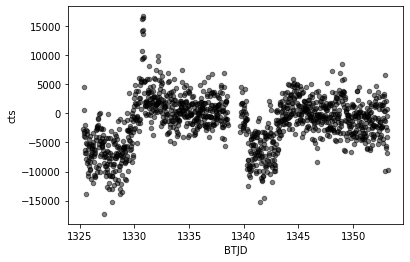

In [156]:
curve.plot.scatter(x="BTJD", y="cts", c="00000", alpha=0.5)

<AxesSubplot:xlabel='BTJD', ylabel='bkg'>

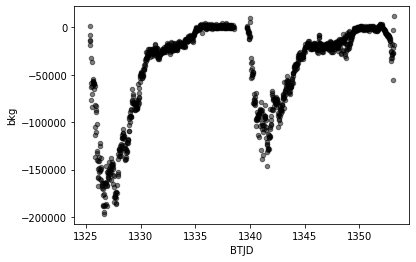

In [158]:
curve.plot.scatter(x="BTJD", y="bkg", c="00000", alpha=0.5)

<AxesSubplot:xlabel='BTJD', ylabel='bkg2'>

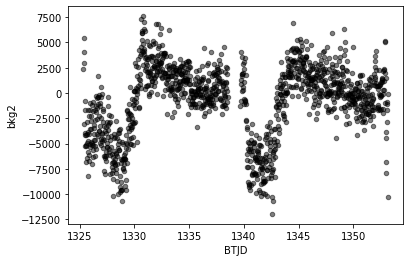

In [154]:
curve.plot.scatter(x="BTJD", y="bkg2", c="00000", alpha=0.5)